# Naive Bayesian

In [1]:
#import logging
import pandas as pd
import numpy as np
#from numpy import random
#import gensim
#import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
#from nltk.corpus import stopwords
#import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE
from sklearn.feature_extraction.text import TfidfTransformer
%matplotlib inline

df = pd.read_csv('new-training-dataset.csv')
df = df[pd.notnull(df['mood'])]
df.head(10)


,user,fullname,tweet-id,timestamp,url,likes,replies,retweets,tweet_text,party,is_duplicate,mood,polarity,compound_score
0,PNJoshiACM,#Chowkidar PiyushJoshi 🇮🇳Unity विकास,1.117050e+18,4/13/2019 13:11,/PNJoshiACM/status/1117052634119143431,1.0,0.0,1.0,great rememb everyvotecount narishakti prove m...,BJP,False,neutral,0.900000,0.9022
1,Pradeep20221694,Pradeep Gautam,1.116020e+18,4/10/2019 16:42,/Pradeep20221694/status/1116018656935280640,0.0,0.0,0.0,select right govt india plea vote vote stop wa...,BJP,False,happiness,0.142857,-0.2960
2,AdityaMudigond_,Chowkidar Aditya Mudigonda ఆదిత్య ముదిగొండ,1.116000e+18,4/10/2019 15:21,/AdityaMudigond_/status/1115998274278658048,0.0,0.0,0.0,kudo artist via wa bharatmangemodidobara phire...,BJP,False,faith,0.000000,0.0000
3,chowkidar_bhakt,चौकीदार लाल टमाटर,1.115930e+18,4/10/2019 10:49,/chowkidar_bhakt/status/1115929827708624898,1.0,0.0,0.0,also need confid level like narendra modi sure...,BJP,False,support,0.500000,0.5859
4,aloktaparia,Chowkidar Alok Taparia,1.120100e+18,4/21/2019 23:16,/aloktaparia/status/1120103978287550465,1.0,0.0,0.0,reduc standard fake news peddler master apolog...,BJP,False,support,-0.100000,-0.4767
5,devendar_ch,Devendar choudhary,1.120090e+18,4/21/2019 22:26,/devendar_ch/status/1120091537948282880,1.0,0.0,0.0,ask proof strike small matter simpli ask proof...,BJP,False,neutral,-0.250000,-0.1027
6,NikhilChelsea12,Chowkidar Nikhil,1.120070e+18,4/21/2019 21:12,/NikhilChelsea12/status/1120072720111112193,1.0,0.0,0.0,put decemb video dalal show frustrat bharatman...,BJP,False,neutral,0.000000,0.0000
7,langer_abbie,Chowkidar Abhi Langer 🇮🇳,1.120060e+18,4/21/2019 20:03,/langer_abbie/status/1120055366039904256,0.0,0.0,0.0,luvli aroma modiagain modiwaapisayega ekbaarph...,BJP,False,neutral,0.000000,0.0000
8,RahulSinhaBJP,Chowkidar Rahul Sinha,1.120040e+18,4/21/2019 19:08,/RahulSinhaBJP/status/1120041716315115520,370.0,13.0,101.0,bjp nation presid shri ji kolkata today addres...,BJP,False,neutral,0.000000,0.2960
9,NamoSantosh123,Chowkidar NaMo Santosh 🇮🇳,1.120040e+18,4/21/2019 18:45,/NamoSantosh123/status/1120035782390161408,3.0,0.0,2.0,todaysnamo campaign sanghvi area mavalpun grea...,BJP,False,neutral,0.800000,0.6249


In [2]:
print(df['tweet_text'].apply(lambda x: len(str(x).split(' '))).sum())

986891


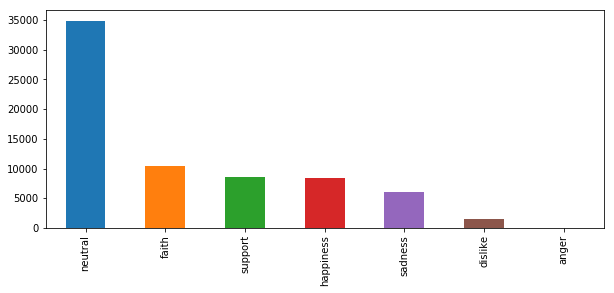

In [3]:
my_mood = ['neutral','happiness','sadness','support','faith','dislike','anger']
plt.figure(figsize=(10,4))
df.mood.value_counts().plot(kind='bar');

In [4]:
X=df['tweet_text'].fillna(' ')
y=df['mood']

counts=y.value_counts()
print(counts)

neutral      34852
faith        10490
support       8584
happiness     8334
sadness       5988
dislike       1446
anger           66
Name: mood, dtype: int64


# Multinomial Naive Bayesian Model

In [5]:
# As Multinomial Naive Bayes model works best with text classification compared to other Naive Bayes models
clf = MultinomialNB()

In [6]:
tv = TfidfVectorizer(stop_words=None, max_features=100000)
testing_tfidf = tv.fit_transform(X)
print(testing_tfidf)

  (0, 16661)	0.22782214778326682
  (0, 35559)	0.2601360917801988
  (0, 13633)	0.3439794703028066
  (0, 28526)	0.4702120514972027
  (0, 33752)	0.27802242172378344
  (0, 25842)	0.25470642329768717
  (0, 4516)	0.22566908552413772
  (0, 46985)	0.25130746340196536
  (0, 41808)	0.2743005502874834
  (0, 4814)	0.1984072116839953
  (0, 4820)	0.4124863797271531
  (1, 4814)	0.17352972163562083
  (1, 37936)	0.2590623362004467
  (1, 36025)	0.17579104623528302
  (1, 16528)	0.18098927227008219
  (1, 19324)	0.23037624078443944
  (1, 32355)	0.16826861208322233
  (1, 45707)	0.22655309548469632
  (1, 40467)	0.20403487212953106
  (1, 46414)	0.19650001587085827
  (1, 29069)	0.1623663177597443
  (1, 7486)	0.25239537859672306
  (1, 28812)	0.24292867341369428
  (1, 17697)	0.2526949678396807
  (1, 19907)	0.3538021400522041
  :	:
  (69757, 30558)	0.22574288543718138
  (69757, 8337)	0.18775283632156944
  (69757, 46945)	0.23854594260141687
  (69757, 11574)	0.45748776704430544
  (69757, 44013)	0.26075298651860446


In [8]:
smt = SMOTE(random_state=777, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_sample(testing_tfidf, y)

In [17]:
df = pd.DataFrame(y_SMOTE)

# After Synthetic Minority Oversampling Technique

Synthetic data generated to handle imbalance 

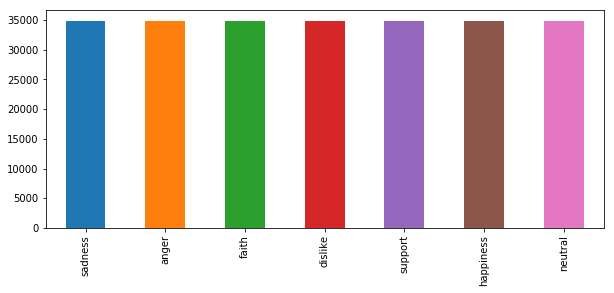

In [16]:
my_mood = ['neutral','happiness','sadness','support','faith','dislike','anger']
plt.figure(figsize=(10,4))
df[0].value_counts().plot(kind='bar');

In [18]:
my_mood = ['neutral','happiness','sadness','support','faith','dislike','anger']


# K-fold and Evaluation metric

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=777)
accuracy = []
precision = []
recall = []
f1 = []
confusionMatrices=[]

nb = Pipeline([('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
               ])

for train, test in kfold.split(X_SMOTE, y_SMOTE):
    nb_fit = nb.fit(X_SMOTE[train], y_SMOTE[train])
    prediction = nb_fit.predict(X_SMOTE[test])
    #print(prediction)
    scores = nb_fit.score(X_SMOTE[test],y_SMOTE[test])
    accuracy.append(scores * 100)
    print(classification_report(y_SMOTE[test],prediction,target_names=my_mood))
    labels=my_mood
    for i in range(10):
        cm=confusion_matrix(y_SMOTE[test],prediction)
        confusionMatrices.append(cm)

print("accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(accuracy), np.std(accuracy)))

              precision    recall  f1-score   support

     neutral       0.98      1.00      0.99      6971
   happiness       0.85      1.00      0.92      6971
     sadness       0.83      0.86      0.85      6971
     support       0.81      0.92      0.86      6971
       faith       0.88      0.42      0.57      6971
     dislike       0.85      0.90      0.88      6971
       anger       0.79      0.87      0.83      6971

   micro avg       0.85      0.85      0.85     48797
   macro avg       0.86      0.85      0.84     48797
weighted avg       0.86      0.85      0.84     48797

              precision    recall  f1-score   support

     neutral       0.98      1.00      0.99      6971
   happiness       0.85      1.00      0.92      6971
     sadness       0.85      0.87      0.86      6971
     support       0.81      0.92      0.86      6971
       faith       0.90      0.41      0.56      6971
     dislike       0.85      0.91      0.88      6971
       anger       0.79 

# Correlation Matrix

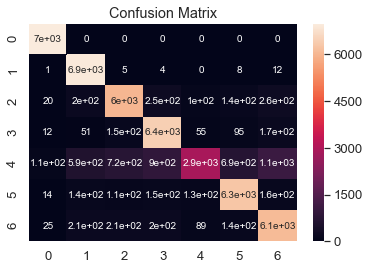

In [24]:
import seaborn as sn
labels=my_mood
matrix=confusionMatrices[0]
ax=plt.axes()
df_cm=pd.DataFrame(matrix,range(7),range(7))
sn.set(font_scale=1.2)#for Label size
sn.heatmap(df_cm,annot=True,annot_kws={"size":10})
ax.set_title('Confusion Matrix')
plt.show()

In [26]:
import pickle
pickle_out = open('./naive_bayes.pkl', 'wb')
pickle.dump(nb, pickle_out)
pickle_out.close()